# Alpha Vantage API Exploration

This notebook contains exploration of the Alpha Vantage API.

[API Documentation](https://www.alphavantage.co/documentation)

[Python Wrapper](https://github.com/RomelTorres/alpha_vantage)

In [59]:
!pip install alpha_vantage

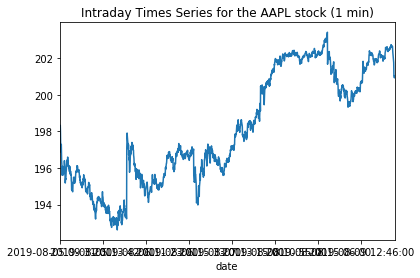

In [63]:
from alpha_vantage.timeseries import TimeSeries
from decouple import config
import matplotlib.pyplot as plt
import pandas as pd

ts = TimeSeries(key=config('ALPHA_VANTAGE'), output_format='pandas')
data, meta_data = ts.get_intraday(symbol='AAPL',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the AAPL stock (1 min)')
plt.show()

In [64]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-08-05 09:31:00,197.99,198.000,196.7500,197.7100,2126171.0
2019-08-05 09:32:00,197.71,198.400,197.4521,197.8449,321724.0
2019-08-05 09:33:00,197.89,198.260,197.6900,198.1300,254311.0
2019-08-05 09:34:00,198.13,198.649,197.8400,198.3394,292661.0
2019-08-05 09:35:00,198.36,198.430,198.0200,198.0200,193629.0


In [66]:
data.shape

(1945, 5)

In [14]:
dir(ts)

['_ALPHA_VANTAGE_API_URL',
 '_ALPHA_VANTAGE_DIGITAL_CURRENCY_LIST',
 '_ALPHA_VANTAGE_MATH_MAP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_append_type',
 '_call_api_on_func',
 '_handle_api_call',
 '_output_format',
 '_retry',
 'get_batch_stock_quotes',
 'get_daily',
 'get_daily_adjusted',
 'get_intraday',
 'get_monthly',
 'get_monthly_adjusted',
 'get_weekly',
 'get_weekly_adjusted',
 'indexing_type',
 'key',
 'map_to_matype',
 'output_format',
 'proxy',
 'retries',
 'set_proxy',
 'treat_info_as_error']

In [19]:
data, meta_data = ts.get_daily(symbol='AAPL',outputsize='full')

data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-08-11,2.0000,2.1339,1.9978,2.1317,212584400.0
1999-08-12,2.1094,2.1920,2.0938,2.1429,166527200.0
1999-08-13,2.1652,2.2143,2.1384,2.1451,74608800.0
1999-08-16,2.1362,2.1674,2.1250,2.1607,69232800.0
1999-08-17,2.1540,2.1563,2.1049,2.1540,80234000.0


In [18]:
data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-08-05,197.99,198.65,192.58,193.34,52393000.0
2019-08-06,196.31,198.07,194.04,197.00,35824800.0
2019-08-07,195.41,199.56,193.82,199.04,33364400.0
2019-08-08,200.20,203.53,199.39,203.43,27009500.0
2019-08-09,201.30,202.76,199.29,200.99,24423000.0


Well that is convenient. Nice clean, compact time series dataframes in pandas. 

In [51]:
from alpha_vantage.techindicators import TechIndicators

ti = TechIndicators(key=config('ALPHA_VANTAGE'), output_format='pandas')

In [23]:
dir(ti)

['_ALPHA_VANTAGE_API_URL',
 '_ALPHA_VANTAGE_DIGITAL_CURRENCY_LIST',
 '_ALPHA_VANTAGE_MATH_MAP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_append_type',
 '_call_api_on_func',
 '_handle_api_call',
 '_output_format',
 '_retry',
 'get_ad',
 'get_adosc',
 'get_adx',
 'get_adxr',
 'get_apo',
 'get_aroon',
 'get_aroonosc',
 'get_atr',
 'get_bbands',
 'get_bop',
 'get_cci',
 'get_cmo',
 'get_dema',
 'get_dx',
 'get_ema',
 'get_ht_dcperiod',
 'get_ht_dcphase',
 'get_ht_phasor',
 'get_ht_sine',
 'get_ht_trendline',
 'get_ht_trendmode',
 'get_kama',
 'get_macd',
 'get_macdext',
 'get_mama',
 'get_mfi',
 'get_midpoint',
 'get_midprice',
 'get_minus_di',
 'get_minus_dm',
 '

In [57]:
sma, extra= ti.get_sma(symbol='AAPL')
sma.head()

,SMA
date,
1999-09-08,2.2837
1999-09-09,2.3121
1999-09-10,2.3432
1999-09-13,2.3699
1999-09-14,2.4008


In [58]:
sma.tail()

,SMA
date,
2019-08-05,205.3805
2019-08-06,205.1685
2019-08-07,204.9590
2019-08-08,205.0430
2019-08-09,204.9275


In [56]:
extra

{'1: Symbol': 'AAPL',
 '2: Indicator': 'Simple Moving Average (SMA)',
 '3: Last Refreshed': '2019-08-09',
 '4: Interval': 'daily',
 '5: Time Period': 20,
 '6: Series Type': 'close',
 '7: Time Zone': 'US/Eastern'}

The API documentation is remarkably easy to use. Therefore it will make up the foundation of the data aggregation algorithm.